In [2]:
#regresion logistica: Titanic 
#importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix  # Para evaluar el modelo
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv(r'D:\Adriana Lucia\Materias (8Semestre)\Analisis de datos\Anexo 6 - Dataset Titanic\Titanic-Dataset.csv')

In [3]:
#pre-visualizar todos los datos de la data set, organizados en una tabla 
pd.set_option('display.max_rows', None)  # ver todas las filas
pd.set_option('display.max_columns', None)  # ver todas las columnas
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [4]:
#ver la información de las columnas, tipos de datos y valores nulos
data.info () 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#visualizar estadísticas básicas de las variables numéricas
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#dato tipo objeto a tipo decimal 
# Convertir la columna 'Sex' a binaria: 1 para 'female' y 0 para 'male'
data['Sex'] = data['Sex'].replace({'female': 1, 'male': 2})
# Verificar los cambios
print(data['Sex'].head())


0    2
1    1
2    1
3    1
4    2
Name: Sex, dtype: int64


C:\Users\marqs\AppData\Local\Temp\ipykernel_9532\552542849.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'female': 1, 'male': 2})


In [7]:
#realizar limpieza de los datos, encontrar valores nulos o faltantes 
#contar los valores faltantes por cada columna 
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#tomar desición de qué hacer con los datos faltantes 
# Rellenar valores nulos en columnas numéricas 
for col in data.select_dtypes(include=[np.number]).columns:
 data[col] = data[col].fillna(data[col].mean())


In [9]:
# Verificar cuántos valores nulos hay después de realizar el paso anterior 
print("\nValores nulos después de rellenar:")
print(data.isnull().sum())


Valores nulos después de rellenar:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#visualizar si existen datos duplicados 
# muestra cuántas filas duplicadas encontro
data.duplicated().sum()  


0

In [11]:
#rellenar los valores faltantes en Cabin tipo object 
#valor más frecuente (moda) de la columna Cabin
moda_cabin = data['Cabin'].mode()[0]
# Reemplazar los valores nulos con la moda de la columna
data['Cabin'] = data['Cabin'].fillna(moda_cabin)


In [12]:
# Verificar si hay valores nulos en Cabin después del reemplazo
print(data['Cabin'].isnull().sum())

0


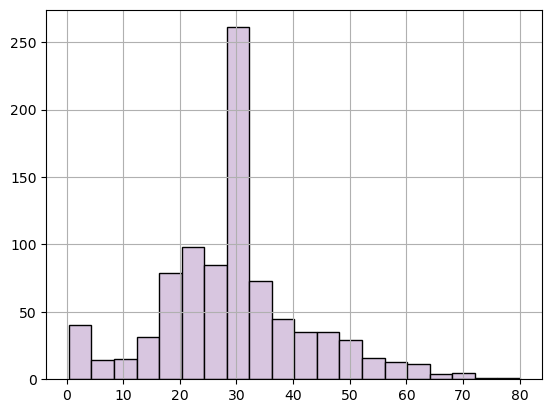

In [13]:
#realizar graficas para obervar el comportamiento de las univariables 
#histograma para ver la edad 
data['Age'].hist(bins=20, color='#d8c6e0', edgecolor='black')
plt.show()


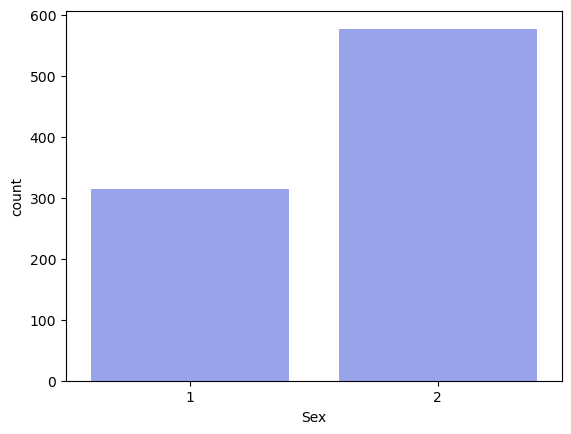

In [14]:
#analizar variables categoricas 
sns.countplot(x='Sex', data=data, color='#8C99F8')
plt.show()


In [15]:
#como crear una paleta de colores personalizada para las gráficas:

# definir los colores en hexadecimal
colores_hex = ['#a6c9c3', '#db91aa', '#537881', '#ed9c82', '#80a0b7']

# guardar la paleta personalizada
pastel_palette = sns.color_palette(colores_hex)

#si se requiere configurar la paleta globalmente con sns.set_palette
sns.set_palette(pastel_palette) 




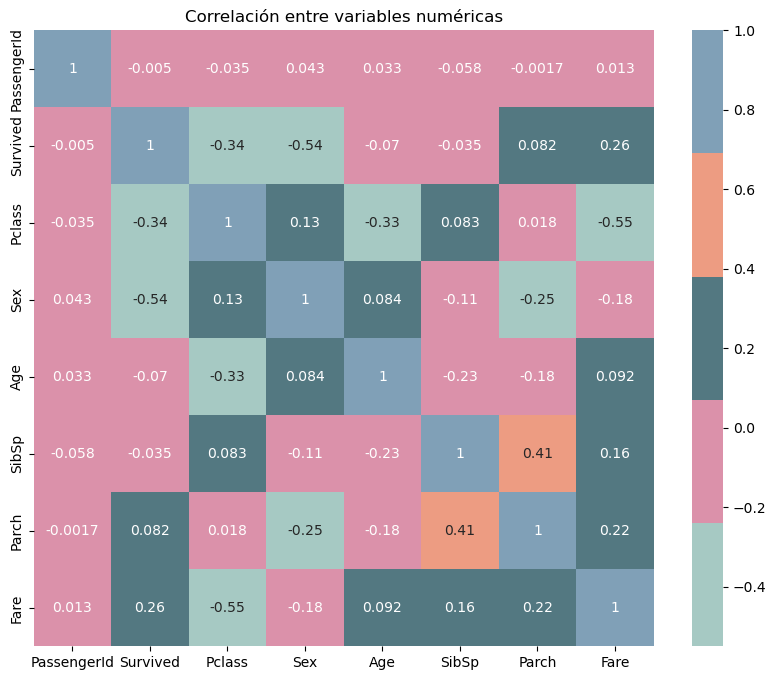

In [16]:
#analisis bivariado 
#observar las relaciones entre variables numericas 
# seleccionar solo columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])
# calcular la matriz de correlación
correlation_matrix = numerical_data.corr()
# crear el heatmap con la paleta personalizada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=pastel_palette)
plt.title("Correlación entre variables numéricas")
plt.show()

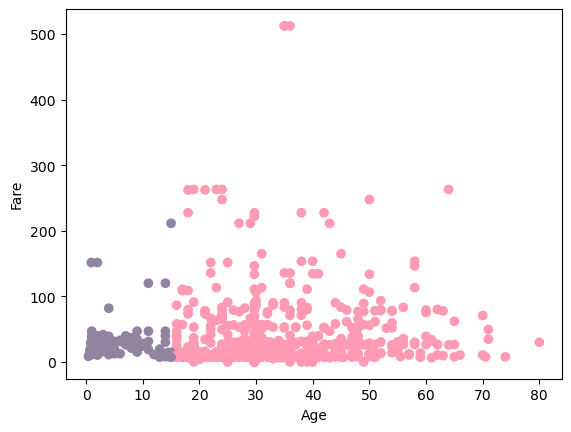

In [17]:
#observar las relaciones entre variables numericas
#se crea una setencia para que cada variable tenga un color diferente
#Umbral de 15:
#Grupo 1 (Menores de 15 años): Aquellos pasajeros cuya edad es menor o igual a 15 años. Es decir, este grupo incluiría a niños y adolescentes.
#Grupo 2 (Mayores de 15 años): Aquellos pasajeros cuya edad es mayor a 15 años. Este grupo incluiría a adultos y adolescentes más cercanos 
#a la edad adulta.
umbral_edad = 15
colors = []
for age, fare in zip(data['Age'], data['Fare']):
    if age > umbral_edad:
        colors.append('#fe9ab2')  
    else:
        colors.append('#9184a0')  

# grafico 
plt.scatter(data['Age'], data['Fare'], c=colors)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


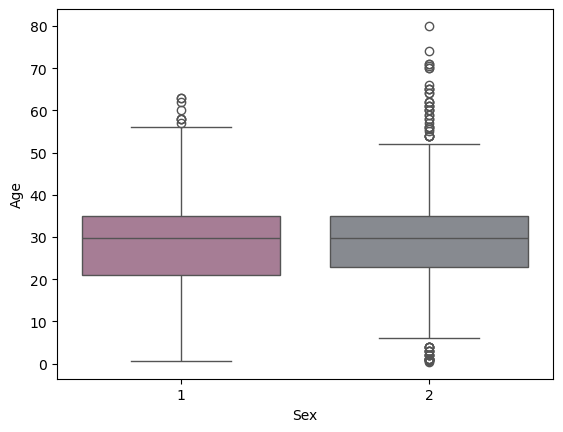

In [46]:
#relación entre variables categóricas y numéricas
#se utilizan colores personalizados
colores_personalizados = {1: '#ad7696', 2: '#858992'}  

# Crear el boxplot
sns.boxplot(x='Sex', y='Age', data=data, hue='Sex', palette=colores_personalizados, legend=False)
plt.show()



In [19]:

#calcular los cuartiles
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
# Calculamos el IQR
IQR = Q3 - Q1
# Definir los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identificar los outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
outliers_age = outliers[[ 'Age']]
print(outliers_age)



       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
54   65.00
78    0.83
94   59.00
96   71.00
116  70.50
119   2.00
152  55.50
164   1.00
170  61.00
172   1.00
174  56.00
183   1.00
195  58.00
205   2.00
232  59.00
252  62.00
268  58.00
275  63.00
280  65.00
297   2.00
305   0.92
326  61.00
340   2.00
366  60.00
381   1.00
386   1.00
438  64.00
456  65.00
467  56.00
469   0.75
479   2.00
483  63.00
487  58.00
492  55.00
493  71.00
530   2.00
545  64.00
555  62.00
570  62.00
587  60.00
625  61.00
626  57.00
630  80.00
642   2.00
644   0.75
647  56.00
659  58.00
672  70.00
684  60.00
694  60.00
745  70.00
755   0.67
772  57.00
788   1.00
803   0.42
824   2.00
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00


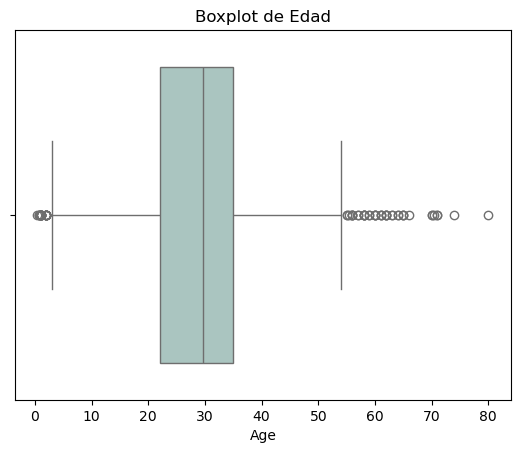

In [20]:
# Crear un boxplot para visualizar los outliers en 'Age'
sns.boxplot(x=data['Age'])
plt.title('Boxplot de Edad')
plt.show()


In [21]:
# definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR  # Límite inferior
limite_superior = Q3 + 1.5 * IQR  # Límite superior
# ver los límites creados
print(f"Límite Inferior: {limite_inferior}")
print(f"Límite Superior: {limite_superior}")
# filtrar el DataFrame para eliminar los outliers
data_sin_outliers = data[(data['Age'] >= limite_inferior) & (data['Age'] <= limite_superior)]
# obtener el resultado
print(data_sin_outliers.head())

Límite Inferior: 2.5
Límite Superior: 54.5
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    2  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    2  35.0      0      0   

             Ticket     Fare    Cabin Embarked  
0         A/5 21171   7.2500  B96 B98        S  
1          PC 17599  71.2833      C85        C  
2  STON/O2. 3101282   7.9250  B96 B98        S  
3            113803  53.1000     C123        S  
4       

In [22]:
# Seleccionar variables independientes y variable dependiente 
data = data[['Sex', 'Age', 'Pclass', 'Fare', 'Survived']]


In [23]:
#definir las variables respecto a X y Y 
# Variables independientes
X = data[['Sex', 'Age', 'Pclass', 'Fare']] 
# Variable dependiente
y = data['Survived']  


In [24]:
from sklearn.preprocessing import StandardScaler
#crear una instancia del escalador
scaler = StandardScaler()
# Normalizar las variables 'Age' y 'Fare'
X.loc[:, ['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
print(X[['Age', 'Fare']].head())


        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [25]:
# Dividir el dataset en conjunto de train y test 
#80% para eñ entrenamiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#crear el modelo de regresión logística
modelo = LogisticRegression(max_iter=200)

In [27]:
#entrenar el modelo
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [28]:
#realizar predicciones
y_pred = modelo.predict(X_test)

In [29]:
from sklearn.metrics import classification_report


In [30]:
# evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7989
Confusion Matrix:
[[89 16]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



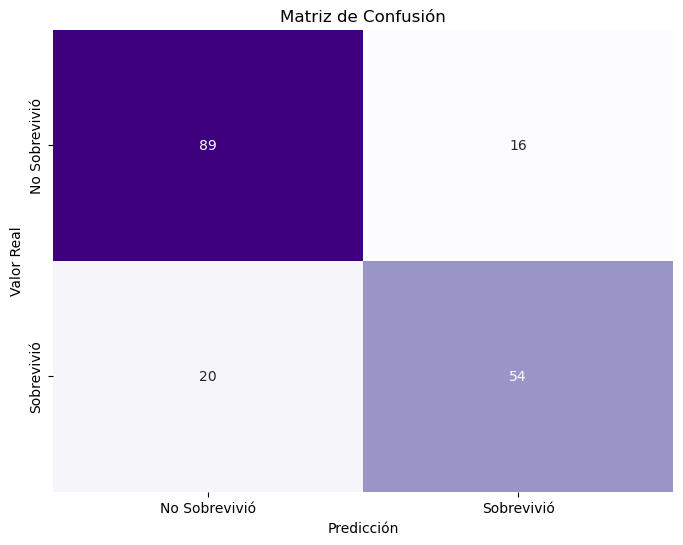

In [31]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, 
            xticklabels=['No Sobrevivió', 'Sobrevivió'], 
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

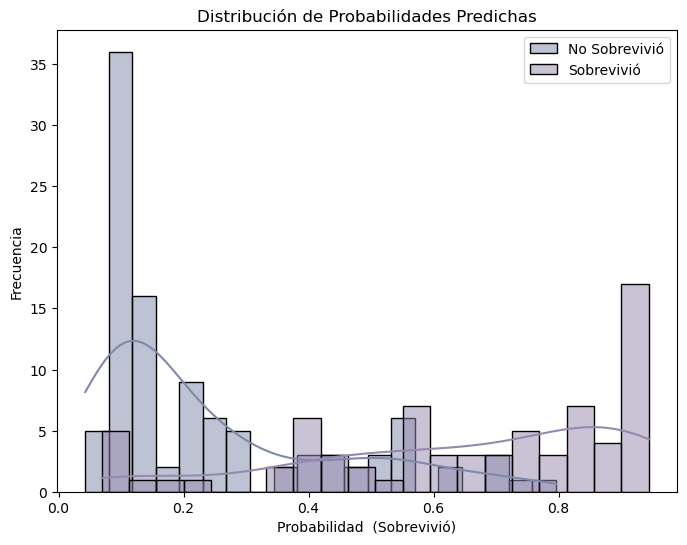

In [32]:
# se obtienen las probabilidades predichas para la clase 1 (Sobrevivió)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 'Sobrevivió' (clase 1)

#  histograma de las probabilidades predichas
plt.figure(figsize=(8, 6))

# Histograma para la clase 0 (No Sobrevivió) y clase 1 (Sobrevivió)
sns.histplot(y_prob[y_test == 0], kde=True, color='#7f89a9', label='No Sobrevivió', bins=20)  # Azul claro
sns.histplot(y_prob[y_test == 1], kde=True, color='#9789ae', label='Sobrevivió', bins=20)  # Gris claro

plt.xlabel('Probabilidad  (Sobrevivió)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades Predichas')
plt.legend()
plt.show()


C:\Users\marqs\AppData\Local\Temp\ipykernel_9532\1617614122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived'] = data['Survived'].astype(int)


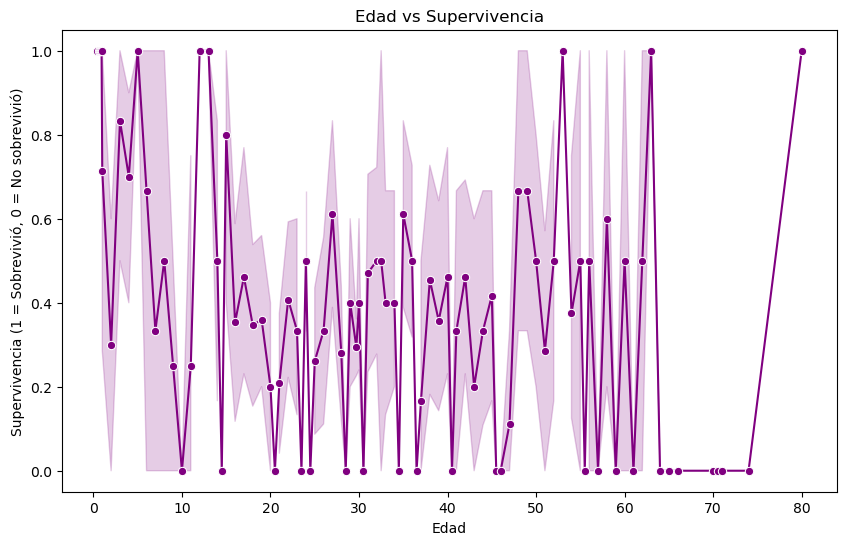

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Survived'] = data['Survived'].astype(int)
# Ordenar los datos por edad para ver la tendencia
data_sorted = data.sort_values(by='Age')

# Grafica Age vs Survived
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sorted, x='Age', y='Survived', color='purple', marker='o')
plt.title("Edad vs Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Supervivencia (1 = Sobrevivió, 0 = No sobrevivió)")
plt.show()


C:\Users\marqs\AppData\Local\Temp\ipykernel_9532\994758348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived'] = data['Survived'].astype(int)


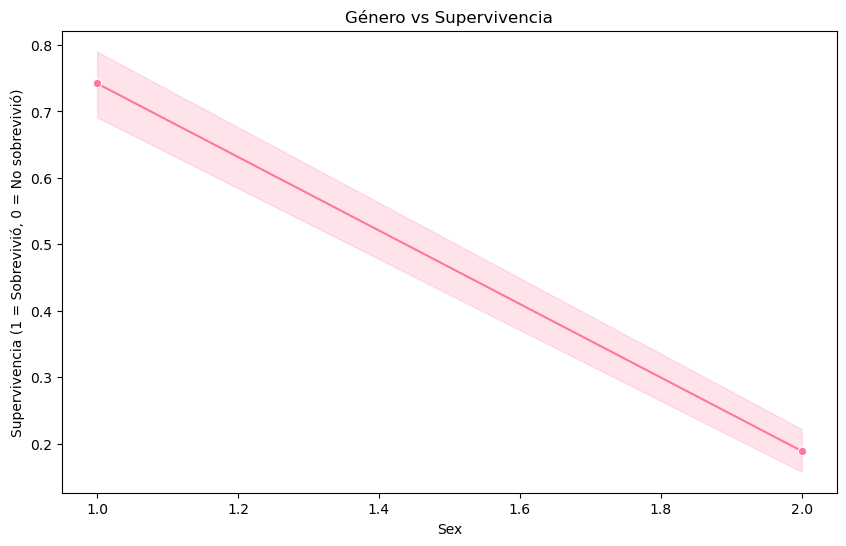

In [41]:
data['Survived'] = data['Survived'].astype(int)
# Ordenar los datos por edad para ver la tendencia
data_sorted = data.sort_values(by='Sex')


plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sorted, x='Sex', y='Survived', color='#FD779D', marker='o')
plt.title("Género vs Supervivencia")
plt.xlabel("Sex")
plt.ylabel("Supervivencia (1 = Sobrevivió, 0 = No sobrevivió)")
plt.show()

C:\Users\marqs\AppData\Local\Temp\ipykernel_9532\4145383473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived'] = data['Survived'].astype(int)


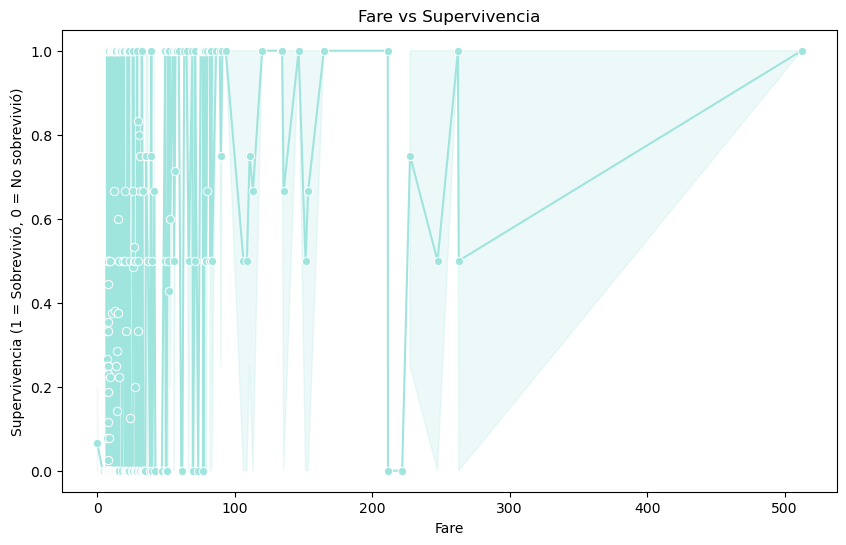

In [45]:
data['Survived'] = data['Survived'].astype(int)
# Ordenar los datos por edad para ver la tendencia
data_sorted = data.sort_values(by='Fare')


plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sorted, x='Fare', y='Survived', color='#A0E4DE', marker='o')
plt.title("Fare vs Supervivencia")
plt.xlabel("Fare")
plt.ylabel("Supervivencia (1 = Sobrevivió, 0 = No sobrevivió)")
plt.show()

C:\Users\marqs\AppData\Local\Temp\ipykernel_9532\4157365506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived'] = data['Survived'].astype(int)


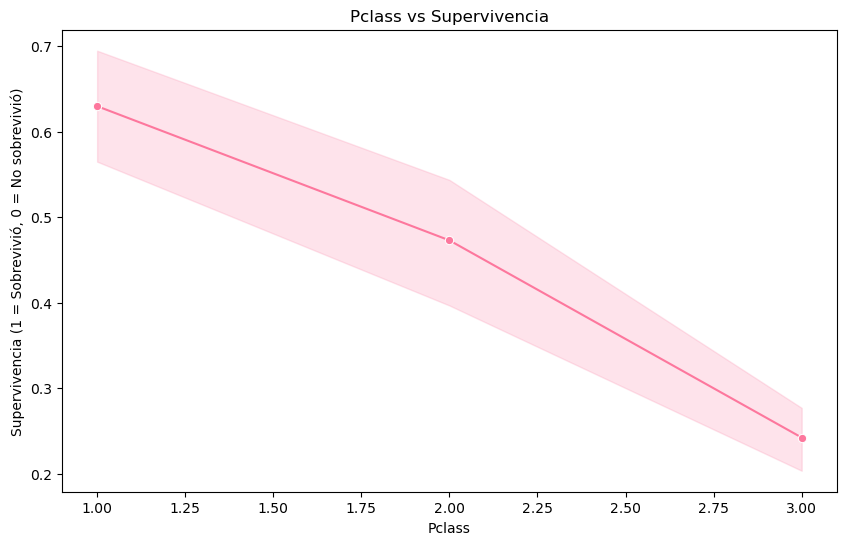

In [43]:
data['Survived'] = data['Survived'].astype(int)
# Ordenar los datos por edad para ver la tendencia
data_sorted = data.sort_values(by='Pclass')

# Grafica Age vs Survived
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_sorted, x='Pclass', y='Survived', color='#FD779D', marker='o')
plt.title("Pclass vs Supervivencia")
plt.xlabel("Pclass")
plt.ylabel("Supervivencia (1 = Sobrevivió, 0 = No sobrevivió)")
plt.show()